# Combining visibilities to form pseudo Stokes visibilities

This example shows how to combine visibilities to form pseudo Stokes I and Q from xx and yy visibilities.

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pyuvdata
import stokes as st

The input can be specified as miriad files or UVData objects. The miriad files are internally converted to UVData objects if the inputs are given as miriad files.

This example uses miriad files with xx and yy polarizations as inputs to form Stokes I and Q.

In [7]:
dset1 = 'data/zen.all.xx.LST.1.06964.uvA' # xx miriad file
dset2 = 'data/zen.all.yy.LST.1.06964.uvA' # yy miriad file

The construct_stokes function validates the input datasets to ensure that the correct datasets are specified to form the pseudo stokes visibilities and calls the combine_pol function. The combine_pol function combines the visibilities to form the pseudo stokes visibilities and change metadata of the UVData object accordingly for example the flags, polarization, history and nsamples.

In [11]:
%reload_ext autoreload
uvI = st.validate_stokes(dset1=dset1,dset2=dset2,stokes='I')
uvQ = st.validate_stokes(dset1=dset1,dset2=dset2,stokes='Q')

AttributeError: 'module' object has no attribute 'validate_stokes'

Displaying the metadata of the UVData object containing the pseudo stokes visibilities.

In [4]:
print 'Polarization: ', (uvI.get_pols())
print 'History:' ,(uvI.history)

Polarization:  ['I']
History: merged to form stokes visibilities. sig_clip=True, sigma=5.0, min_N=4, rephase=True Input files: zen.2458042.53563.xx.HH.uvXR-zen.2458042.54309.xx.HH.uvXR-zen.2458042.55054.xx.HH.uvXR-zen.2458043.53563.xx.HH.uvXR-zen.2458043.54309.xx.HH.uvXR-zen.2458043.55054.xx.HH.uvXR-zen.2458044.53562.xx.HH.uvXR-zen.2458044.54308.xx.HH.uvXR-zen.2458044.55054.xx.HH.uvXR-zen.2458045.52817.xx.HH.uvXR-zen.2458045.53562.xx.HH.uvXR-zen.2458045.54308.xx.HH.uvXR-zen.2458046.52817.xx.HH.uvXR-zen.2458046.53563.xx.HH.uvXR-zen.2458046.54308.xx.HH.uvXR-zen.2458047.52817.xx.HH.uvXR-zen.2458047.53562.xx.HH.uvXR-zen.2458048.52071.xx.HH.uvXR-zen.2458048.52816.xx.HH.uvXR-zen.2458048.53562.xx.HH.uvXR-zen.2458049.52071.xx.HH.uvXR-zen.2458049.52817.xx.HH.uvXR-zen.2458049.53562.xx.HH.uvXR-zen.2458050.51326.xx.HH.uvXR-zen.2458050.52072.xx.HH.uvXR-zen.2458050.52817.xx.HH.uvXR-zen.2458051.51326.xx.HH.uvXR-zen.2458051.52072.xx.HH.uvXR-zen.2458051.52817.xx.HH.uvXR-zen.2458052.51325.xx.HH.uvXR-zen

# Plotting pseudo Stokes I and Q visibilties 

divide by zero encountered in log10
divide by zero encountered in log10


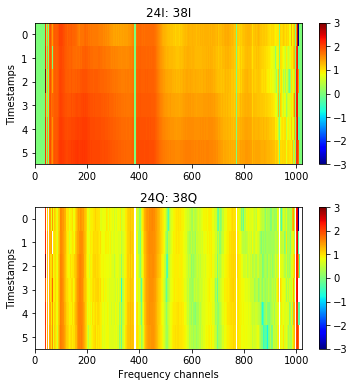

In [5]:
dataI = uvI.get_data(24,38)
dataQ = uvQ.get_data(24,38)

plt.figure(figsize=(6,6))
plt.subplot(211)
plt.title('24I: 38I')
plt.imshow(np.log10(np.abs(dataI)),aspect='auto',vmin=-3,vmax=3,cmap='jet')
plt.colorbar()
plt.ylabel('Timestamps')

plt.subplot(212)
plt.title('24Q: 38Q')
plt.imshow(np.log10(np.abs(dataQ)),aspect='auto',vmin=-3,vmax=3,cmap='jet')
plt.colorbar()
plt.xlabel('Frequency channels')
plt.ylabel('Timestamps')

plt.subplots_adjust(hspace=0.3)